Week3-Pratical
Group members:

**Yaohui WANG / Mauricia Fleurance EVINA / Hanrui ZHANG**

For this practical work, we did all of the work on google-colab, so basically we just have one file for the codes.

Firstly we had uploaded our dataset on drive and call it here.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import os
import numpy as np
#!pip install tqdm

In [ ]:
pwd


'C:\\Users\\hzhang245\\Desktop\\ml-25m'

In [ ]:
#Load "genome-tags" CSV file
file_path1 = 'C:\\Users\\hzhang245\\Desktop\\ml-25m\\'
genome_tags_df = pd.read_csv(file_path1+'genome-tags.csv')
genome_scores_df = pd.read_csv(file_path1+'genome-scores.csv')
movies_df = pd.read_csv(file_path1+'movies.csv')
links_df = pd.read_csv(file_path1+'links.csv')
tags_df = pd.read_csv(file_path1+'tags.csv')
rating_df = pd.read_csv(file_path1+'ratings.csv')

## In the first step, you have to represent each movie as vector using the different genres and the tags.


### Distinct movies

In [ ]:
print("Numbers of Movie: " + str(len(movies_df['movieId'].value_counts())))
movies_df.tail()
movies_df

Numbers of Movie: 62423


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
62418,209157,We (2018),Drama
62419,209159,Window of the Soul (2001),Documentary
62420,209163,Bad Poems (2018),Comedy|Drama
62421,209169,A Girl Thing (2001),(no genres listed)



We got 62423 different movies.

### Distinct genres

In [ ]:
# Split the genres by '|' and create a new dataframe with movieId and genre columns
genres_df = movies_df['genres'].str.split('|', expand=True).stack().reset_index(level=1, drop=True).rename('genre').to_frame()
genres_df = genres_df.join(movies_df['movieId']).reset_index(drop=True)

print( "Numbers of Genres:" + str(len(genres_df['genre'].value_counts())))
genres_df['genre'].value_counts()

Numbers of Genres:20


Drama                 25606
Comedy                16870
Thriller               8654
Romance                7719
Action                 7348
Horror                 5989
Documentary            5605
Crime                  5319
(no genres listed)     5062
Adventure              4145
Sci-Fi                 3595
Children               2935
Animation              2929
Mystery                2925
Fantasy                2731
War                    1874
Western                1399
Musical                1054
Film-Noir               353
IMAX                    195
Name: genre, dtype: int64

We can see that we have 20 different genres of the movies in the movies dataset.

### Create the item_profiles dataframe
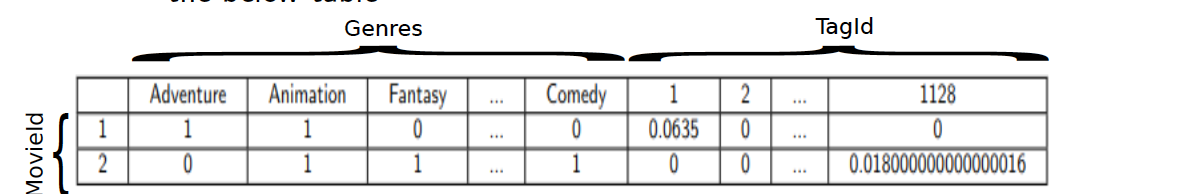

In [ ]:
import pandas as pd
import numpy as np

# Create a list of distinct genres
distinct_genres = list(set().union(*movies_df['genres'].str.split('|')))

# Create a list of distinct tag IDs from genome_tags_df
distinct_tag_ids = list(genome_tags_df['tagId'].unique())

# Create a binary-encoded dataframe for genres
genres_binary_df = pd.DataFrame(columns=distinct_genres)
genres_binary_df['movieId'] = movies_df['movieId']
for genre in distinct_genres:
    genres_binary_df[genre] = movies_df['genres'].apply(lambda x: int(genre in x))

# Create a dataframe for tag IDs with relevance values
tag_relevance_df = genome_scores_df.pivot(index='movieId', columns='tagId', values='relevance')

# Filter the tag relevance dataframe to include only distinct tag IDs from genome_tags_df
tag_relevance_df = tag_relevance_df[distinct_tag_ids]

# Merge genres and tag relevance dataframes based on movieId
merged_df = pd.merge(genres_binary_df, tag_relevance_df, left_on='movieId', right_index=True, how='outer')

# Fill missing tag relevance values with 0
merged_df[distinct_tag_ids] = merged_df[distinct_tag_ids].fillna(0)

# Delete rows where movieId is NaN
merged_df = merged_df.dropna(subset=['movieId'])

# Set movieId as the first column
merged_df = merged_df[['movieId'] + list(merged_df.columns.difference(['movieId']))]

# Arrange columns to show genres first and then tags
merged_df = merged_df[['movieId'] + distinct_genres + distinct_tag_ids]



In [ ]:
tag_relevance_df

tagId,1,2,3,4,5,6,7,8,9,10,...,1119,1120,1121,1122,1123,1124,1125,1126,1127,1128
movieId,,,,,,,,,,,,,,,,,,,,,
1,0.02875,0.02375,0.06250,0.07575,0.14075,0.14675,0.06350,0.20375,0.20200,0.03075,...,0.04050,0.01425,0.03050,0.03500,0.14125,0.05775,0.03900,0.02975,0.08475,0.02200
2,0.04125,0.04050,0.06275,0.08275,0.09100,0.06125,0.06925,0.09600,0.07650,0.05250,...,0.05250,0.01575,0.01250,0.02000,0.12225,0.03275,0.02100,0.01100,0.10525,0.01975
3,0.04675,0.05550,0.02925,0.08700,0.04750,0.04775,0.04600,0.14275,0.02850,0.03875,...,0.06275,0.01950,0.02225,0.02300,0.12200,0.03475,0.01700,0.01800,0.09100,0.01775
4,0.03425,0.03800,0.04050,0.03100,0.06500,0.03575,0.02900,0.08650,0.03200,0.03150,...,0.05325,0.02800,0.01675,0.03875,0.18200,0.07050,0.01625,0.01425,0.08850,0.01500
5,0.04300,0.05325,0.03800,0.04100,0.05400,0.06725,0.02775,0.07650,0.02150,0.02975,...,0.05350,0.02050,0.01425,0.02550,0.19225,0.02675,0.01625,0.01300,0.08700,0.01600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205072,0.02050,0.01775,0.11400,0.03650,0.31225,0.03675,0.10700,0.37925,0.01725,0.36350,...,0.18675,0.03650,0.03025,0.12900,0.13975,0.42425,0.03400,0.02350,0.41725,0.09100
205076,0.03825,0.03150,0.03200,0.05325,0.20850,0.07050,0.06625,0.27825,0.00950,0.02750,...,0.27775,0.03225,0.04675,0.03175,0.23025,0.06300,0.04175,0.04125,0.07275,0.02350
205383,0.04100,0.04025,0.02750,0.07850,0.19750,0.17825,0.17125,0.30475,0.16825,0.04850,...,0.16525,0.03250,0.02400,0.03575,0.20400,0.08525,0.04600,0.02900,0.11725,0.03925


In [ ]:
merged_df

,movieId,Thriller,Film-Noir,Fantasy,Children,Crime,Comedy,Western,Mystery,IMAX,...,1119,1120,1121,1122,1123,1124,1125,1126,1127,1128
0,1,0,0,1,1,0,1,0,0,0,...,0.04050,0.01425,0.03050,0.03500,0.14125,0.05775,0.03900,0.02975,0.08475,0.02200
1,2,0,0,1,1,0,0,0,0,0,...,0.05250,0.01575,0.01250,0.02000,0.12225,0.03275,0.02100,0.01100,0.10525,0.01975
2,3,0,0,0,0,0,1,0,0,0,...,0.06275,0.01950,0.02225,0.02300,0.12200,0.03475,0.01700,0.01800,0.09100,0.01775
3,4,0,0,0,0,0,1,0,0,0,...,0.05325,0.02800,0.01675,0.03875,0.18200,0.07050,0.01625,0.01425,0.08850,0.01500
4,5,0,0,0,0,0,1,0,0,0,...,0.05350,0.02050,0.01425,0.02550,0.19225,0.02675,0.01625,0.01300,0.08700,0.01600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62418,209157,0,0,0,0,0,0,0,0,0,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
62419,209159,0,0,0,0,0,0,0,0,0,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
62420,209163,0,0,0,0,0,1,0,0,0,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
62421,209169,0,0,0,0,0,0,0,0,0,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000


### Save into csv

In [ ]:
#merged_df.to_csv(file_path1+'item_profiles.csv', index=False)

# Offline component – Sampling
- Having the profile of each items, we want to mimic the situation where we
are going to recommend some movies to some users.
- For this we need to assume some rating given by these users as ignored.
- Therefore, from the ratings.csv file, for each user, you are asked to randomly
select 98% of its rating as offline data (this will stand as the historical data
information) and the remaining 2% should be used as test for online purpose

In [ ]:
item_profiles_df = pd.read_csv(file_path1+'item_profiles.csv',index_col='movieId')

In [ ]:
item_profiles_df

,Thriller,Film-Noir,Fantasy,Children,Crime,Comedy,Western,Mystery,IMAX,Musical,...,1119,1120,1121,1122,1123,1124,1125,1126,1127,1128
movieId,,,,,,,,,,,,,,,,,,,,,
1,0,0,1,1,0,1,0,0,0,0,...,0.04050,0.01425,0.03050,0.03500,0.14125,0.05775,0.03900,0.02975,0.08475,0.02200
2,0,0,1,1,0,0,0,0,0,0,...,0.05250,0.01575,0.01250,0.02000,0.12225,0.03275,0.02100,0.01100,0.10525,0.01975
3,0,0,0,0,0,1,0,0,0,0,...,0.06275,0.01950,0.02225,0.02300,0.12200,0.03475,0.01700,0.01800,0.09100,0.01775
4,0,0,0,0,0,1,0,0,0,0,...,0.05325,0.02800,0.01675,0.03875,0.18200,0.07050,0.01625,0.01425,0.08850,0.01500
5,0,0,0,0,0,1,0,0,0,0,...,0.05350,0.02050,0.01425,0.02550,0.19225,0.02675,0.01625,0.01300,0.08700,0.01600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209157,0,0,0,0,0,0,0,0,0,0,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
209159,0,0,0,0,0,0,0,0,0,0,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
209163,0,0,0,0,0,1,0,0,0,0,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000


### Use ratings.csv to get offline_sample and online_sample

In [ ]:
rating_df = pd.read_csv(file_path1+'ratings.csv')

In [ ]:
#rating_df.head()

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


### Split rating_df and save offline sample and online sample into csv

In [ ]:
# Count the number of ratings for each user
user_ratings_counts = rating_df['userId'].value_counts()

# Sort the number of ratings in descending order
user_ratings_counts_sorted = user_ratings_counts.sort_values(ascending=False)

# Print the number of ratings for each user in descending order
print(user_ratings_counts_sorted)


72315     32202
80974      9178
137293     8913
33844      7919
20055      7488
          ...  
135032       20
51779        20
135012       20
135005       20
36207        20
Name: userId, Length: 162541, dtype: int64


The data is too big, I trying some method to slit them, because we need to split the data for each user, so we should groupby firstly

In [ ]:
def splitd(sample_data, train_proportion=0.98, seed=42):
    train_data = sample_data.groupby('userId').apply(lambda x: x.iloc[:int(len(x) * train_proportion)])
    test_data = pd.concat([sample_data, train_data]).drop_duplicates(keep=False)

    train_data.reset_index(drop=True, inplace=True)
    test_data.reset_index(drop=True, inplace=True)

    return train_data, test_data

In [ ]:
offline_sample,online_sample = splitd(rating_df)

In [ ]:
print(offline_sample.shape)
print(online_sample.shape)

(24422889, 4)
(577206, 4)


In [ ]:
# Save the offline data and test data to separate CSV files
offline_sample.to_csv(file_path1+ 'offline_sample.csv', index=False)
online_sample.to_csv(file_path1+'online_sample.csv', index=False)

In [ ]:
offline_sample = pd.read_csv(file_path1+'offline_sample.csv')
online_sample = pd.read_csv(file_path1+'online_sample.csv')

### Count the distinct users in offline sample

In [ ]:
# Count the number of distinct users
n_users = rating_df['userId'].nunique()
print("Number of distinct users rating:", n_users)
n_users = offline_sample['userId'].nunique()
print("Number of distinct users offline:", n_users)
n_users = online_sample['userId'].nunique()
print("Number of distinct users online:", n_users)


Number of distinct users rating: 162541
Number of distinct users offline: 162541
Number of distinct users online: 162541


So in offline sample we have 162541 of distinct users

### Issues here:

---

We have too many data to create the user_profiles, We tried to read the data of the user1 , it related to 69 rows and already take us more than 15 mins to finished, so....
We also tries on SQL,it should be faster but we failed...
So for return the related dataframe, we just run the sample data of offline

In [ ]:
len(offline_sample)

24500093

In [ ]:
from sklearn.model_selection import train_test_split
# Specify the number of training samples
num_train_samples = 10000
# Calculate the number of testing samples
num_test_samples = len(offline_sample) - num_train_samples
# Split the data into training and testing sets
offline_sample1,_ = train_test_split(offline_sample, train_size=num_train_samples, test_size=num_test_samples, random_state=42)


In [ ]:
user_df = pd.DataFrame(index=offline_sample['userId'].unique(), columns=item_profiles_df.columns)

In [ ]:
userId = 1  # Specify the desired userId

for index, row in offline_sample.iterrows():
    if row['userId'] == userId:
        movieId = int(row['movieId'])
        rating = row['rating']

        movie_profile = item_profiles_df.loc[movieId].values  # vector of item
        user_profile = rating * movie_profile

        # Add the calculated user profile to the dataframe
        user_df.loc[userId] = user_df.loc[userId].add(user_profile, fill_value=0)


In [ ]:
# Iterate over each row in 'user_profile' and calculate user profiles
for index, row in offline_sample1.iterrows():
    userId = row['userId']
    movieId = int(row['movieId'])
    rating = row['rating']

    movie_profile = item_profiles_df.loc[movieId].values #vector of item
    user_profile = rating * movie_profile

    # Add the calculated user profile to the dataframe
    user_df.loc[userId] = user_df.loc[userId].add(user_profile, fill_value=0)

# Divide the user profiles by the cardinality of the rated items
#cardinalities = user_profile.groupby('userId').size()
#user_df = user_df.div(cardinalities, axis=0)

# Fill missing values with zeros
#user_df.fillna(0, inplace=True)

In [ ]:
user_df

,Thriller,Film-Noir,Fantasy,Children,Crime,Comedy,Western,Mystery,IMAX,Musical,...,1119,1120,1121,1122,1123,1124,1125,1126,1127,1128
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.0,0.0,0.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,...,0.28625,0.1,0.095,0.81125,1.16875,0.71875,0.15875,0.07625,0.53375,0.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162537,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162538,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162539,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162540,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Offline component – Building recommender system

In [ ]:
offline_sample

,userId,movieId,rating,timestamp
0,61755,3624,3.0,975477033
1,69250,158,2.0,1460895280
2,82917,49013,3.0,1457465118
3,82931,71254,0.5,1458521231
4,32320,5309,1.5,1062711182
...,...,...,...,...
24500088,66673,3992,4.0,1384208152
24500089,36670,294,3.0,1119365480
24500090,41927,108932,3.5,1429214121
24500091,36383,6993,5.0,1564941069


## Visualized the rating dataframe

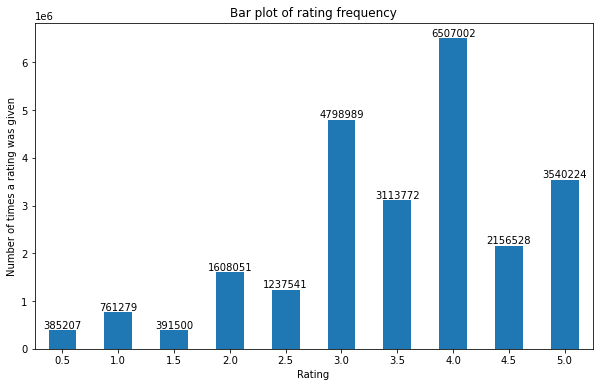

In [ ]:
import matplotlib.pyplot as plt

# Count the frequency of each rating
rating_counts = offline_sample['rating'].value_counts(sort=False)

# Define the order of ratings
rating_order = [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]

# Plot the bar plot with ordered ratings
plt.figure(figsize=(10, 6))
rating_counts.loc[rating_order].plot(kind='bar', rot=0)
plt.title('Bar plot of rating frequency')
plt.xlabel('Rating')
plt.ylabel('Number of times a rating was given')

# Add labels to the bars
label = list(rating_counts.loc[rating_order])
for i, val in enumerate(label):
    plt.text(i, val, str(val), ha='center', va='bottom')

plt.show()


We can observe that most of the users have rewarded movies they watched with a 4 star rating and followed by 3 star and 5 star.

In [ ]:
# Join the offline_sample dataframe with the movies_df dataframe based on movieId
movie_title_df = offline_sample.merge(movies_df[['movieId', 'title']], on='movieId', how='left')

# Display the new dataframe
movie_title_df

,userId,movieId,rating,timestamp,title
0,61755,3624,3.0,975477033,Shanghai Noon (2000)
1,69250,158,2.0,1460895280,Casper (1995)
2,82917,49013,3.0,1457465118,"Santa Clause 3: The Escape Clause, The (2006)"
3,82931,71254,0.5,1458521231,Gamer (2009)
4,32320,5309,1.5,1062711182,Three Men and a Little Lady (1990)
...,...,...,...,...,...
24500088,66673,3992,4.0,1384208152,Malèna (2000)
24500089,36670,294,3.0,1119365480,"Perez Family, The (1995)"
24500090,41927,108932,3.5,1429214121,The Lego Movie (2014)
24500091,36383,6993,5.0,1564941069,Hannah and Her Sisters (1986)


In [ ]:
# Join the offline_sample dataframe with the movies_df dataframe based on movieId
movie_title_df = offline_sample.merge(movies_df[['movieId', 'title']], on='movieId', how='left')
# Display the new dataframe
#print(movie_title_df)
avg_highly_rated_movies = movie_title_df.groupby(['title']).agg({"rating":"mean"})['rating'].sort_values(ascending=False)
avg_highly_rated_movies = avg_highly_rated_movies.to_frame()
avg_highly_rated_movies.head(20)

,rating
title,
There Is a New World Somewhere (2015),5.0
Stranger in My House (1999),5.0
Desert Commandos (1966),5.0
The Hardy Bucks Movie (2013),5.0
Plato's Reality Machine (2013),5.0
About Sarah,5.0
Garfield Goes Hollywood (1987),5.0
Garfield In Paradise (1986),5.0
Garfield in the Rough (1984),5.0


## According to you what could be the nice approach (classification or regression)? motivate your answer

We cam see the highest rating movies in general. So if it's a knowledge based recommendation system we can just introduce these highly rated movies to new users.

According to the problem statement, the goal is to recognize user ratings based on the offline sample data. In this context, a suitable approach would be regression rather than classification. Regression models can predict the numerical ratings on a continuous scale, which aligns well with the task of estimating user ratings. Classification models, on the other hand, are more appropriate when the target variable has discrete categories or labels. However, since user ratings are typically represented as continuous values (e.g., 1-5 stars), regression is a more natural choice.

Input Data (Features):
- The input data should be represented as a 2-dimensional array or a pandas DataFrame.
- Each row represents an instance (sample) from the offline sample dataset.
- Each column represents a feature (input variable) that is used to predict the user rating.
- The values in the input data should be numerical or can be transformed into numerical representations suitable for scikit-learn models.

Output Data (Target Variable):
- The output data should be represented as a 1-dimensional array or a pandas Series.
- It represents the user rating, which is a continuous numerical value.
- The values in the output data should be continuous numerical ratings, such as 1-5 stars.



Now I want to predict the ratings by building a regression model.

# Baseline Model
## Linear Regressor

In [ ]:
import pandas as pd
import os
import numpy as np
#!pip install tqdm

In [ ]:
#Load "genome-tags" CSV file
file_path1 = 'C:\\Users\\hzhang245\\Desktop\\Eva2023\\ml-25m\\'
genome_tags_df = pd.read_csv(file_path1+'genome-tags.csv')
genome_scores_df = pd.read_csv(file_path1+'genome-scores.csv')
movies_df = pd.read_csv(file_path1+'movies.csv')
links_df = pd.read_csv(file_path1+'links.csv')
tags_df = pd.read_csv(file_path1+'tags.csv')
rating_df = pd.read_csv(file_path1+'ratings.csv')

In [ ]:
offline_sample = pd.read_csv(file_path1+'offline_sample.csv')
online_sample = pd.read_csv(file_path1+'online_sample.csv')

In [ ]:
from sklearn.model_selection import train_test_split

# Create the feature matrix X and the target vector y
X = offline_sample[['userId', 'movieId']]
y = offline_sample['rating']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and test sets
print("Train set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Train set shape: (19600074, 2) (19600074,)
Test set shape: (4900019, 2) (4900019,)


In [ ]:
from sklearn.model_selection import cross_val_score, ShuffleSplit
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
# Initialize the model
model = LinearRegression()

# Perform cross-validation and calculate the mean squared error
scores = cross_val_score(model, X_train, y_train, cv=5)

model.fit(X_train,y_train)

test_score = model.score(X_test,y_test)
print(scores)
print(test_score)


[7.72143769e-05 9.30552780e-05 8.74243914e-05 8.25492035e-05
 9.52359544e-05]
9.34577640443468e-05


## Online Component – Recommending

In [ ]:
# Prepare the feature matrix for the Online dataset
X_online = online_sample[['userId', 'movieId']]

# Predict the ratings for the Online dataset
online_sample['predicted_rating'] = model.predict(X_online)

# Print the Online dataset with predicted ratings
print(online_sample[['userId', 'movieId', 'predicted_rating','rating']])


        userId  movieId  predicted_rating  rating
0            1    31956          3.527933     3.5
1            1    32591          3.527775     5.0
2            2    34162          3.527385     0.5
3            2    35836          3.526968     0.5
4            2    36527          3.526796     3.5
...        ...      ...               ...     ...
577201  162540    69844          3.524923     4.5
577202  162541    55768          3.528424     2.5
577203  162541    56176          3.528322     2.0
577204  162541    58559          3.527730     4.0
577205  162541    63876          3.526407     5.0

[577206 rows x 4 columns]


In [ ]:
total_users = len(online_sample['userId'].unique())
total_well_recommended_movies = 0

for user_id in online_sample['userId'].unique():
    user_data = online_sample[online_sample['userId'] == user_id]
    positively_rated_movies = len(user_data[user_data['rating'] > 2])

    # Check if there are positively rated movies for the user
    if positively_rated_movies > 0:
        well_recommended_movies = len(user_data[(user_data['predicted_rating'] > 2) & (user_data['rating'] > 2)])
        proportion = well_recommended_movies / positively_rated_movies
        total_well_recommended_movies += proportion

evaluation_model = total_well_recommended_movies / total_users
print("Evaluation Model:", evaluation_model)


Evaluation Model: 0.9531072160254951


An evaluation model value of 0.9531072160254951 suggests that the model has a high capability to recommend movies accurately. This value represents the proportion of well-recommended movies over the total number of users in the online sample.

A value close to 1 indicates that a large majority of the recommended movies were positively rated by the users. In other words, the model's predictions aligned well with the users' preferences, as indicated by the actual ratings. This indicates a strong performance of the model in recommending movies to users.

Overall, a high evaluation model value suggests that the model is effective in predicting user ratings and making relevant movie recommendations.